### Convolutional Neural Networks
Example of identification of handwritten digits from: 'https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/'

In [18]:
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

In [33]:
#Load dataset
(trainX, trainy),(testX,testy) = mnist.load_data()


In [20]:
#Summarize loaded dataset
print('Train sets: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test sets: X=%s, y=%s' % (testX.shape, testy.shape))

Train sets: X=(60000, 28, 28), y=(60000,)
Test sets: X=(10000, 28, 28), y=(10000,)


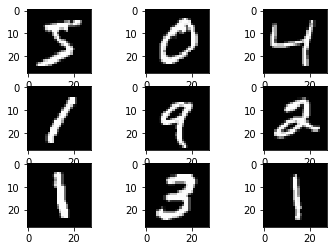

In [21]:
#plot a few images:
for i in range(9):
    #define subplot:
    pyplot.subplot(330+1+i)
    #plot raw pixel data
    pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
#show figure
pyplot.show()

In [22]:
#Reshape and normalize
train_images = trainX.reshape((60000,28,28,1))
test_images = testX.reshape((10000,28,28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = tf.keras.utils.to_categorical(trainy)
test_labels = tf.keras.utils.to_categorical(testy)

### Model alternatives
The first model presented is the one belonging to the first chapters of the book. It's a simple nn.

The second model is an improved nn taken from the beggining of chapter 5.

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [25]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3833 - accuracy: 0.8780
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0503 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0326 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0185 - accuracy: 0.9945


In [ ]:
test_loss,test_acc = model.evaluate(test_images, test_labels)
test_acc

In [34]:
model.fit(trainX, trainy, epochs=5,batch_size = 64)
model.evaluate(testX, testy, verbose=2)


Epoch 1/5


ValueError: in user code:

    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:808 train_function  *
        return step_function(self, iterator)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:798 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2731 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3420 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:791 run_step  **
        outputs = model.train_step(data)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:757 train_step
        y_pred = self(x, training=True)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1000 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/iris/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)


### Prediction and checking
With this part of the notebook, one can chech a single image. By selecting a number in ```image```, we are choosing a file from the testing dataset. It is later entered in the model to obtain its prediction. Theprediction is displayed as the label of the image. The image itself is the one the model has processed.

[1.4804161e-09 4.6733919e-07 9.9999952e-01 1.6414300e-13 9.3125327e-11
 2.6252774e-15 9.2772794e-09 9.0597736e-14 8.9541947e-09 1.4223273e-15]
0


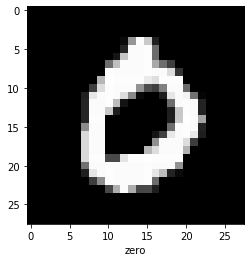

In [45]:
image = 3
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
prediction=model.predict(test_images)
print(prediction[1])
ind = np.argmax(prediction[image])
print(ind)
pyplot.imshow(testX[image],cmap=pyplot.get_cmap('gray'))
pyplot.xlabel(class_names[ind])
pyplot.show()